In [11]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import difflib 

difflib.get_close_matches
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

# Read the City and Ride Data and combine the data into a single dataset
city_df['city'] = city_df['city'].apply(lambda x: difflib.get_close_matches(x, ride_df['city'])[0])
pyber_df = pd.merge(ride_df, city_df, on = "city", how = 'left')

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# locating each city type
urban = pyber_df.loc[pyber_df["type"]=="Urban", :]
suburban = pyber_df.loc[pyber_df["type"]=="Suburban", :]
rural = pyber_df.loc[pyber_df["type"]=="Rural", :]

In [13]:
# getting avg fare, total rides and total drivers, per type and city
avgfare_urban = urban.groupby(['city'])["fare"].mean()
totrides_urban = urban.groupby(['city'])["ride_id"].count()
totdrivers_urban = urban.groupby(["city"])["driver_count"].sum()

avgfare_suburban = suburban.groupby(suburban["city"])["fare"].mean()
totrides_suburban = suburban.groupby(suburban["city"])["ride_id"].count()
totdrivers_suburban = suburban.groupby(["city"])["driver_count"].sum()

avgfare_rural = rural.groupby(rural["city"])["fare"].mean()
totrides_rural = rural.groupby(rural["city"])["ride_id"].count()
totdrivers_rural = rural.groupby(["city"])["driver_count"].sum()

## Bubble Plot of Ride Sharing Data

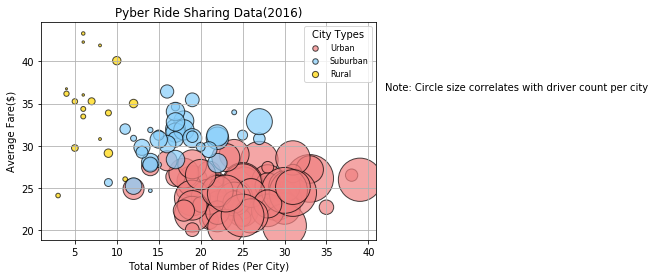

In [21]:
# Build the scatter plots for each city types
urban_plt = plt.scatter(totrides_urban, avgfare_urban, s=totdrivers_urban, 
            marker ='o', facecolors ="lightcoral", linewidths=1, edgecolors='black', alpha = 0.7, label="Urban")

suburban_plt = plt.scatter(totrides_suburban, avgfare_suburban, s=totdrivers_suburban, 
            marker ='o', facecolors ="lightskyblue", linewidths=1, edgecolors='black', alpha = 0.7, label="Suburban")

rural_plt = plt.scatter(totrides_rural, avgfare_rural, s=totdrivers_rural, 
            marker ='o', facecolors ="gold", linewidths=1, edgecolors='black', alpha = 0.7, label="Rural")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

# Create a legend
legend = plt.legend(handles=[urban_plt, suburban_plt, rural_plt], loc = "upper right", fontsize=8, title="City Types")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[1]._sizes = [30]

# Incorporate a text label regarding circle size
plt.annotate("Note: Circle size correlates with driver count per city",
            xy=(1.42, 0.65), xytext=(0, 10),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=10, ha='center', va='center')

# Save Figure
fig1 = plt.gcf()
plt.show
fig1.savefig("../Images/Pyber Scatterplot.png", bbox_inches="tight")

## Total Fares by City Type

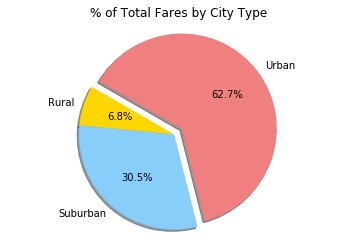

In [20]:
# Calculate Type Percents
totfare = pyber_df.groupby(["type"])["fare"].sum()

# Build Pie Chart
plt.pie(totfare, labels=totfare.index, explode = (0, 0, 0.1), shadow=True, 
        colors=["gold", "lightskyblue", "lightcoral"], autopct="%1.1f%%", startangle=150)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
fig2 = plt.gcf()
plt.show()
fig2.savefig("../Images/Total Fares by City Type.png", bbox_inches="tight")

## Total Rides by City Type

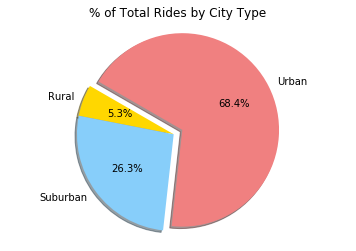

In [23]:
# Calculate Ride Percents
ridepercent = pyber_df.groupby(["type"])["ride_id"].count()

# Build Pie Chart
plt.pie(ridepercent, labels=ridepercent.index, explode = (0, 0, 0.1), shadow=True, 
        colors=["gold", "lightskyblue", "lightcoral"], autopct="%1.1f%%", startangle=150)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure
fig3 = plt.gcf()
plt.show()
fig3.savefig("../Images/Total Rides by City Type.png")

## Total Drivers by City Type

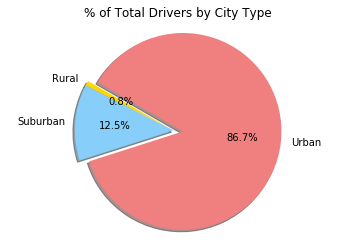

In [24]:
# Calculate Driver Percents
driverpercent = pyber_df.groupby(["type"])["driver_count"].sum()

# Build Pie Chart
plt.pie(driverpercent, labels=driverpercent.index, explode = (0, 0, 0.1), shadow=True, 
        colors=["gold", "lightskyblue", "lightcoral"], autopct="%1.1f%%", startangle=150)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
fig4 = plt.gcf()
plt.show()
fig4.savefig("../Images/Total Drivers by City Type.png")